In [10]:
!pip install tf-nightly

In [11]:
!pip install pydot

In [12]:
!pip install graphviz jupyter

In [1]:
import tensorflow as tf
tf.__version__

'2.13.0-dev20230402'

In [2]:
from tensorflow.keras.applications import EfficientNetB0

import required model:

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [13]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import cv2
import os
from warnings import filterwarnings
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, TensorBoard,
ModelCheckpoint)
from sklearn.metrics import confusion_matrix, classification_report

Preprocessing:

In [5]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('C:\\Users\\Nithya\\Downloads\\data\\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('C:\\Users\\Nithya\\Downloads\\data\\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

Train-test-split:

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

logs and checkpoint:

In [9]:
tensorboard=TensorBoard(log_dir="logs")
checkpoint=ModelCheckpoint("modelNew.h5", monitor="val_accuracy",save_best_only=True, mode="auto", verbose= 1)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.3,patience=2,min_delta=0.0001, mode="auto", verbose= 1)

In [10]:
from tensorflow.keras.applications.vgg16 import preprocess_input as process_vgg16 
from tensorflow.keras.applications.resnet50 import preprocess_input as process_resnet 
from keras.layers import concatenate
from keras.layers import Concatenate
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.applications import VGG16, ResNet50

Vgg-16 and resNet-50:

In [11]:
vgg16=VGG16(weights="imagenet",include_top=False,input_shape=(image_size,
image_size, 3))
resnet =ResNet50(weights="imagenet",include_top=False,input_shape=(image_size, image_size, 3))
inp = tf.keras.Input((image_size,image_size,3))

Vgg-16:

In [12]:
from keras.layers import Dense, Reshape, Lambda
vgg_16_process = Lambda(process_vgg16)(inp)
vgg_16= vgg16(vgg_16_process)
x_vgg_16= MaxPooling2D()( vgg_16)
x_vgg_16= Dense (128, activation='relu')(x_vgg_16)
x_vgg_16=Dropout(0.25)(x_vgg_16)
x_vgg_16=Flatten()(x_vgg_16)
x_vgg_16 = Dense(64, activation='relu')(x_vgg_16)
x_vgg_16= Dropout(0.25)(x_vgg_16)
x_vgg_16= Dense(32,activation = "relu")(x_vgg_16)

ResNet-50:

In [13]:
resnet_process = Lambda(process_resnet)(inp)
res_net = resnet(resnet_process)
x_resnet = MaxPooling2D()(res_net)
x_resnet = Dense(128, activation='relu')(x_resnet)
x_resnet = Dropout(0.25)(x_resnet)
x_resnet= Flatten()(x_resnet)
x_resnet = Dense(64, activation = "relu")(x_resnet)
x_resnet = Dropout(0.25)(x_resnet)
x_resnet = Dense(32, activation = "relu")(x_resnet)

Concatenation:

In [14]:
x = Concatenate()([x_vgg_16, x_resnet]) 
out=Dense(4,activation = "softmax" )(x)
model=Model(inp, out)
model.compile(loss = "categorical_crossentropy",optimizer="Adam", metrics="accuracy")

Model summary:

In [15]:
model.summary()
tf.keras.utils.plot_model(model,show_shapes=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 150, 150, 3)          0         ['input_3[0][0]']             
                                                                                                  
 lambda_1 (Lambda)           (None, 150, 150, 3)          0         ['input_3[0][0]']             
                                                                                                  
 vgg16 (Functional)          (None, 4, 4, 512)            1471468   ['lambda[0][0]']              
                                                          8                                   

In [17]:
!pip install pydot

Training the model:

In [16]:
model_history=model.fit(X_train,y_train, validation_split = 0.1,epochs=9, verbose=1, callbacks = [tensorboard, checkpoint, reduce_lr])

Epoch 1/9
83/83 [==============================] - ETA: 0s - loss: 2.9631 - accuracy: 0.6670 
Epoch 1: val_accuracy improved from -inf to 0.29592, saving model to modelNew.h5


c:\Users\Nithya\anaconda3\lib\site-packages\keras\src\engine\training.py:2990: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


83/83 [==============================] - 926s 11s/step - loss: 2.9631 - accuracy: 0.6670 - val_loss: 7.3470 - val_accuracy: 0.2959 - lr: 0.0010
Epoch 2/9
83/83 [==============================] - ETA: 0s - loss: 0.5218 - accuracy: 0.8055 
Epoch 2: val_accuracy improved from 0.29592 to 0.47959, saving model to modelNew.h5
83/83 [==============================] - 957s 12s/step - loss: 0.5218 - accuracy: 0.8055 - val_loss: 3.4933 - val_accuracy: 0.4796 - lr: 0.0010
Epoch 3/9
83/83 [==============================] - ETA: 0s - loss: 0.4458 - accuracy: 0.8509 
Epoch 3: val_accuracy improved from 0.47959 to 0.58163, saving model to modelNew.h5
83/83 [==============================] - 948s 11s/step - loss: 0.4458 - accuracy: 0.8509 - val_loss: 1.5070 - val_accuracy: 0.5816 - lr: 0.0010
Epoch 4/9
83/83 [==============================] - ETA: 0s - loss: 0.2613 - accuracy: 0.9168 
Epoch 4: val_accuracy improved from 0.58163 to 0.79932, saving model to modelNew.h5
83/83 [===========================

Save model

In [17]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/tf-models/new_model.h5')

C:\Users\Nithya\AppData\Local\Temp\ipykernel_14128\3502110890.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'/content/drive/MyDrive/tf-models/new_model.h5')


plot the results:

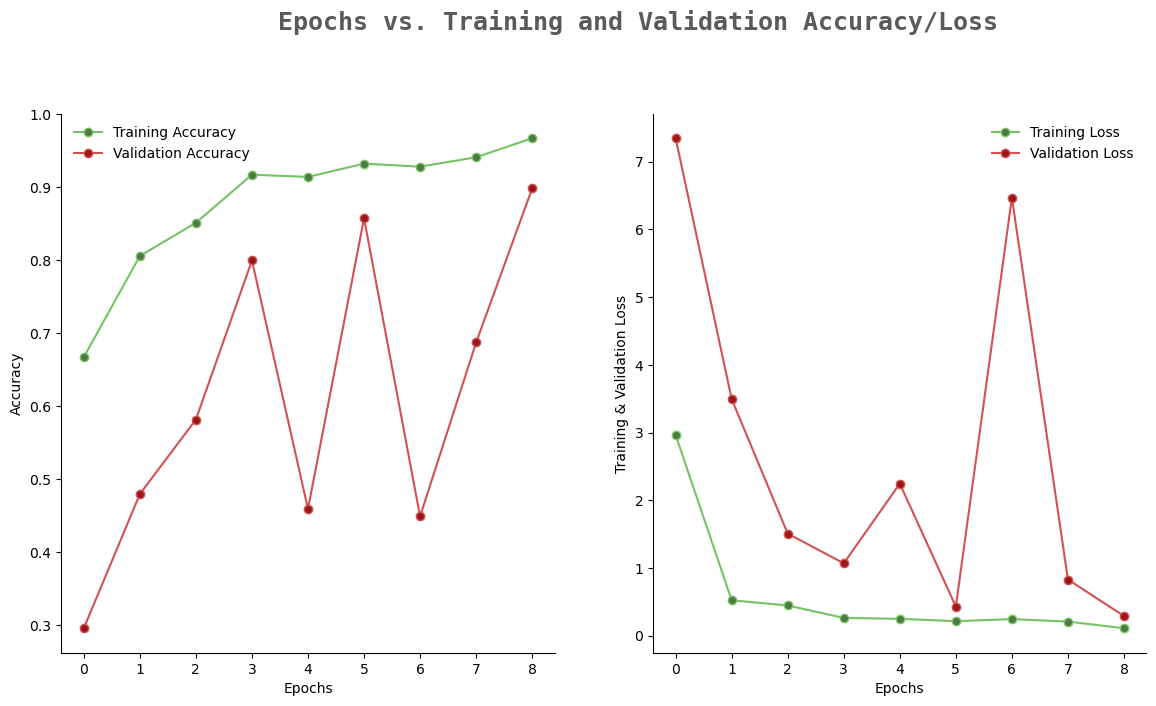

In [18]:
colors_dark = ["#1F1FIF", "#313131", "#636363", "#AEAEAE", "#DADADA"] 
colors_red = ["#331313", "#582626", "#9E1717", "#D35151", "#E9B4B4"] 
colors_green=[ "#01411C", "#4B6F44", "#4F7942", "#74C365", "#D0F0C0"]
filterwarnings("ignore")
epochs =[ i for i in range(9)]
fig, ax = plt.subplots(1, 2,figsize=(14,7))
train_acc1 = model_history.history[ "accuracy" ] 
train_loss1 = model_history.history[ "loss"]
val_acc1 = model_history.history[ "val_accuracy" ]
val_loss1 = model_history.history[ "val_loss" ]
fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold', fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)
sns.despine()
ax[0].plot(epochs, train_acc1,marker='o',markerfacecolor=colors_green[2],color=colors_green[3],label="Training Accuracy")
ax[0].plot(epochs, val_acc1, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],label="Validation Accuracy")
ax[0].legend(frameon=False)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
sns.despine()
ax[1].plot( epochs[:],train_loss1,marker='o',markerfacecolor=colors_green[2],color=colors_green[3],label="Training Loss")
ax[1].plot( epochs[:],val_loss1,marker="o",markerfacecolor=colors_red[2],color=colors_red[3],label = "Validation Loss")
ax[1].legend(frameon=False)
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
fig.show()

Prediction:

11/11 [==============================] - 16s 1s/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        93
           1       0.96      0.95      0.95        95
           2       0.79      0.96      0.87        52
           3       0.98      0.98      0.98        87

    accuracy                           0.94       327
   macro avg       0.93      0.94      0.93       327
weighted avg       0.94      0.94      0.94       327



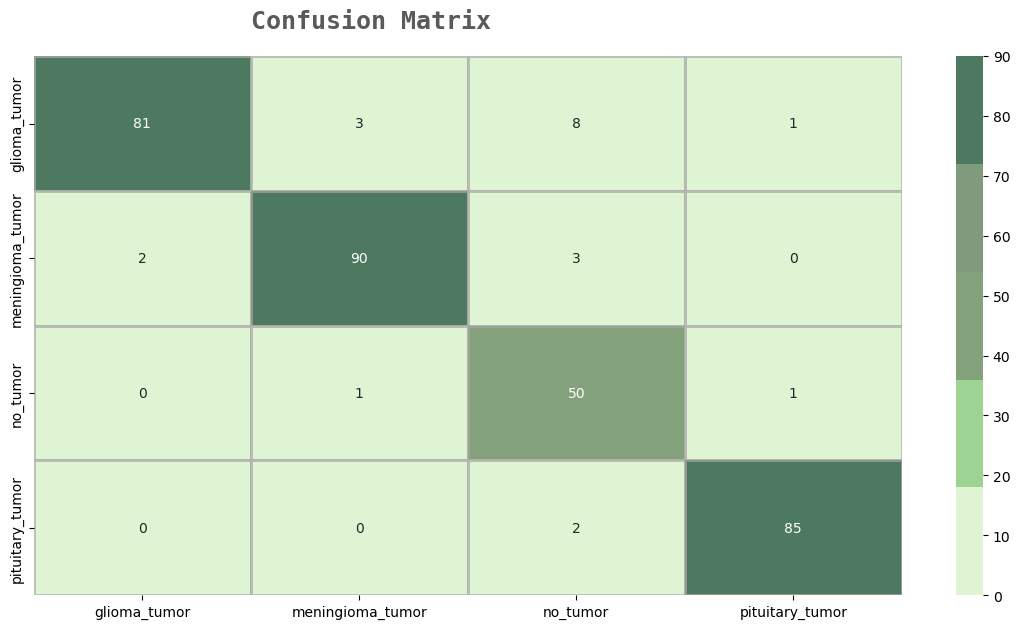

In [20]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new=np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred), ax = ax, xticklabels = labels,yticklabels =
labels, annot=True,cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s="Confusion Matrix", size = 18, fontweight = "bold",fontname="monospace",color=colors_dark[1],y=0.92, x = 0.28, alpha = 0.8)
plt.show()

Import modules for deployment:

In [1]:
from PIL import Image

import numpy as np
import cv2
import tensorflow as tf
from warnings import filterwarnings

import tkinter as tk
from tkinter import *
from tkinter.ttk import *
from PIL import Image, ImageTk
from tkinter.font import Font
from tkinter import filedialog

load the CNN model:

In [2]:
model=tf.keras.models.load_model('modelNew.h5')
print("Function called")

Function called


Upload image function:

In [3]:
def upload_file():
    global img1
    f_types = [('Jpg Files', '*.jpg')]
    filename  = filedialog.askopenfilename(filetypes=f_types)
    img1 = Image.open(filename)
    resize_image =img1.resize((225, 225))
    img1 = ImageTk.PhotoImage(resize_image)
    iml =tk.Label(root,image=img1)
    iml.place(x=640,y=350)
    l5= tk.Button(root, text='Predict', width=125, image = pred_img, bg='white',fg='#42bffc', 
                  compound = tk.LEFT, relief='flat', cursor = 'hand2', command=lambda:img_pred())
    l5.place(x=700,y=650)

    


In [3]:
global img1, l5

predict function:

In [4]:
def img_pred():
    global img1
    pimg = ImageTk.getimage(img1)
    opencvImage = cv2.cvtColor(np.array(pimg), cv2.COLOR_RGB2BGR)
    pimg = cv2.resize(opencvImage,(150,150))
    pimg = pimg.reshape(1,150,150,3)
    p=model.predict(pimg)
    p=np.argmax(p, axis= 1)[0]
    ans= ' '
    if p == 0:
        ans = "The Model predicts that it is a Glioma Tumor"
    elif p == 1:
        ans="The model predicts that there is no tumor"
    elif p == 2:
        ans="The model predicts that it is a Meningioma Tumor"
    else:
        ans="The model predicts that it is a pitutary Tumor"
    l5['text']=ans
    l5.place(x=450,y=725)


        

In [5]:
from PIL import Image, ImageTk, ImageFont

In [6]:
%pip install Flask

Note: you may need to restart the kernel to use updated packages.


GUI display:

In [7]:
root = tk.Tk() #root=tk.Toplevel()
root.geometry("1920x1080") # Size of the window
l1_font=Font(size='30', weight="bold")
l1 = tk.Label(root, text='Brain Tumor Detection', font=l1_font, fg='#42bffc', bg='white')
l2_font=Font(size="20", weight="bold")
l2= tk.Label(root, text='1. Select an MRI image: ', font=l2_font, fg='#42bffc', bg='white')
l3_font=Font(size="20", weight="bold")
l3 = tk.Label(root, text='2. Uploaded image: ', font=l3_font, fg='#42bffc', bg='white')
l4_font=Font(size="20", weight="bold")
l4 = tk.Label(root, text='3. Prediction: ', font=l4_font, fg='#42bffc', bg='white')
l5_font=Font(size="20", weight="bold")
l5 = tk.Label(root, text=" ", font=l5_font, fg='#42bffc', bg='white')
file_path = filedialog.askopenfilename()
image = Image.open(file_path)
resize_image = image.resize((20, 20))
pred_img = ImageTk.PhotoImage(resize_image)
b1 = tk.Button(root, text=' Upload', width=125, image = pred_img, bg='white',fg='#42bffc', compound = tk.LEFT, relief='flat', cursor =
'hand2', command =lambda:upload_file())
l1.place(x=570,y=50)
l2.place(x=275,y=175)
b1.place(x=700,y=225)
l3.place(x=275,y=300)
l4.place(x=275,y=600)
root.mainloop()



1/1 [==============================] - 0s 126ms/step
